PCA example with Iris Data-set

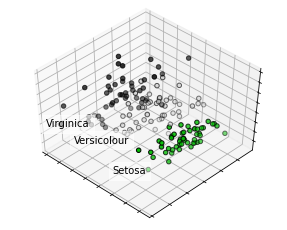

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition
from sklearn import datasets

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

for name, label in [("Setosa", 0), ("Versicolour", 1), ("Virginica", 2)]:
    ax.text3D(
        X[y == label, 0].mean(),
        X[y == label, 1].mean() + 1.5,
        X[y == label, 2].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
    )
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral, edgecolor="k")

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

Comparison of LDA and PCA 2D projection of Iris dataset

explained variance ratio (first two components): [0.92461872 0.05306648]


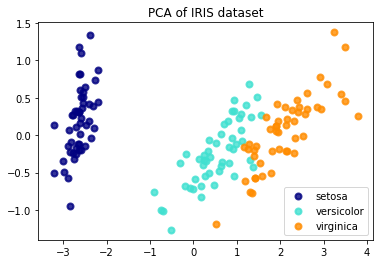

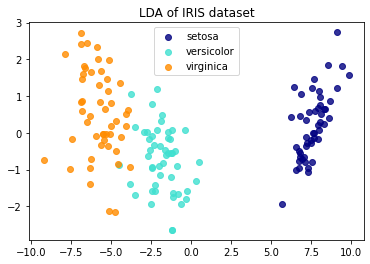

In [6]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
print(
    "explained variance ratio (first two components): %s"
    % str(pca.explained_variance_ratio_)
)

plt.figure()
colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of IRIS dataset")

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_r2[y == i, 0], X_r2[y == i, 1], alpha=0.8, color=color, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("LDA of IRIS dataset")

plt.show()

PCA using randomized SVD

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data
Dataset consists of 400 faces
Extracting the top 6 Eigenfaces - PCA using randomized SVD...
done in 0.171s
Extracting the top 6 Non-negative components - NMF...
done in 0.834s
Extracting the top 6 Independent components - FastICA...
done in 0.245s
Extracting the top 6 Sparse comp. - MiniBatchSparsePCA...
done in 1.026s
Extracting the top 6 MiniBatchDictionaryLearning...
done in 1.269s
Extracting the top 6 Cluster centers - MiniBatchKMeans...
done in 0.224s
Extracting the top 6 Factor Analysis components - FA...
done in 0.924s


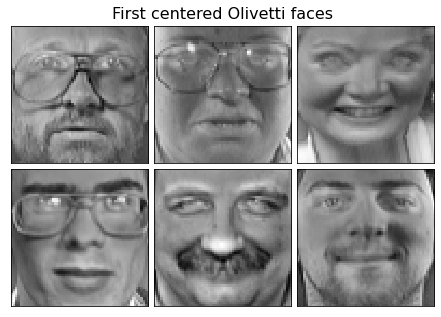

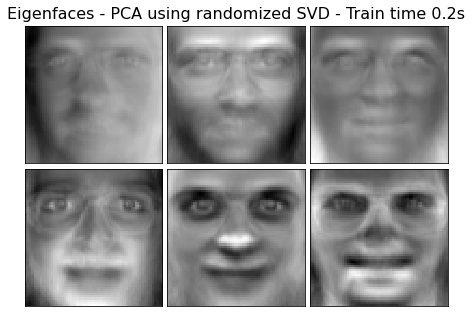

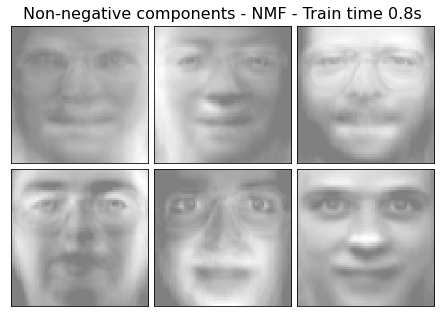

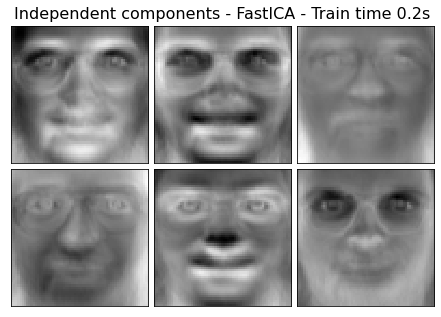

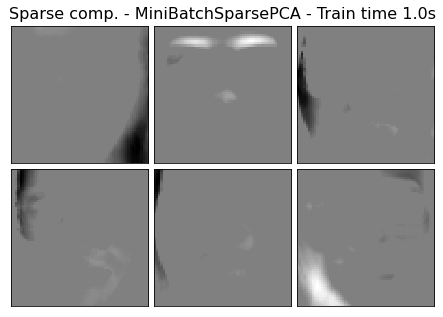

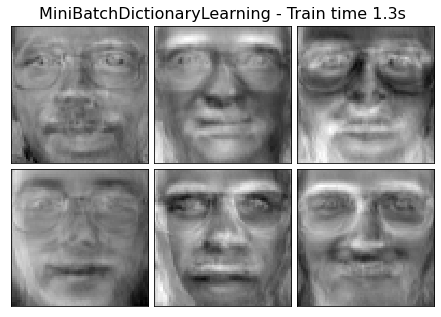

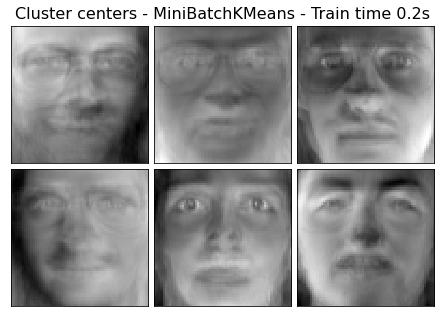

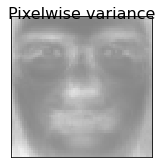

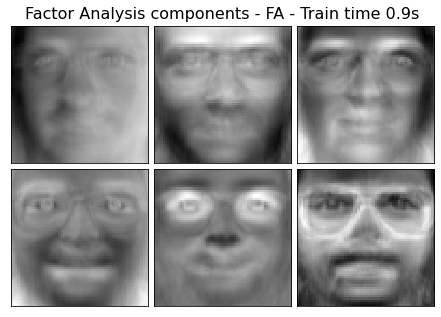

Extracting the top 6 Dictionary learning...
done in 1.367s
Extracting the top 6 Dictionary learning - positive dictionary...
done in 1.479s
Extracting the top 6 Dictionary learning - positive code...
done in 0.305s
Extracting the top 6 Dictionary learning - positive dictionary & code...
done in 0.376s


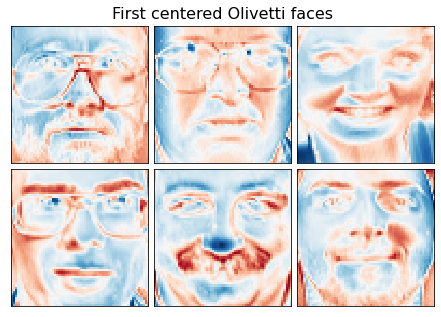

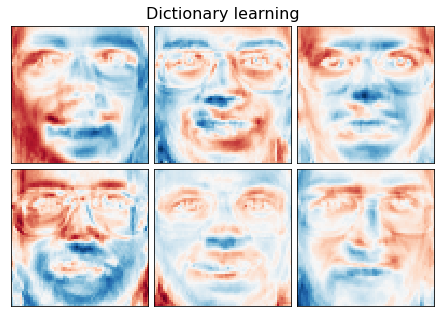

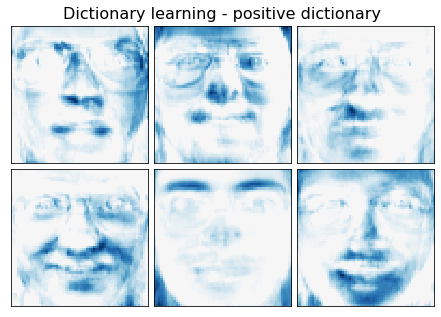

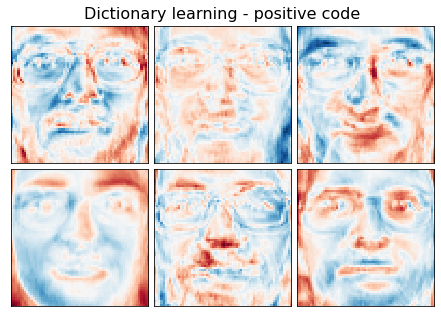

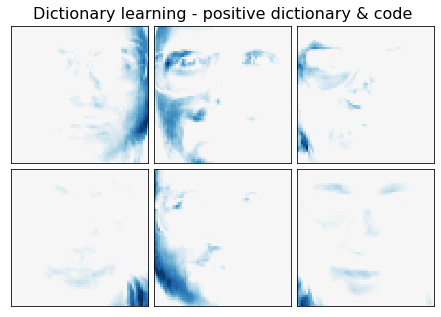

In [7]:
import logging
from time import time

from numpy.random import RandomState
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_olivetti_faces
from sklearn.cluster import MiniBatchKMeans
from sklearn import decomposition

# Display progress logs on stdout
logging.basicConfig(level=logging.INFO, format="%(asctime)s %(levelname)s %(message)s")
n_row, n_col = 2, 3
n_components = n_row * n_col
image_shape = (64, 64)
rng = RandomState(0)

# #############################################################################
# Load faces data
faces, _ = fetch_olivetti_faces(return_X_y=True, shuffle=True, random_state=rng)
n_samples, n_features = faces.shape

# global centering
faces_centered = faces - faces.mean(axis=0)

# local centering
faces_centered -= faces_centered.mean(axis=1).reshape(n_samples, -1)

print("Dataset consists of %d faces" % n_samples)


def plot_gallery(title, images, n_col=n_col, n_row=n_row, cmap=plt.cm.gray):
    plt.figure(figsize=(2.0 * n_col, 2.26 * n_row))
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        vmax = max(comp.max(), -comp.min())
        plt.imshow(
            comp.reshape(image_shape),
            cmap=cmap,
            interpolation="nearest",
            vmin=-vmax,
            vmax=vmax,
        )
        plt.xticks(())
        plt.yticks(())
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.0)


# #############################################################################
# List of the different estimators, whether to center and transpose the
# problem, and whether the transformer uses the clustering API.
estimators = [
    (
        "Eigenfaces - PCA using randomized SVD",
        decomposition.PCA(
            n_components=n_components, svd_solver="randomized", whiten=True
        ),
        True,
    ),
    (
        "Non-negative components - NMF",
        decomposition.NMF(n_components=n_components, init="nndsvda", tol=5e-3),
        False,
    ),
    (
        "Independent components - FastICA",
        decomposition.FastICA(n_components=n_components, whiten=True),
        True,
    ),
    (
        "Sparse comp. - MiniBatchSparsePCA",
        decomposition.MiniBatchSparsePCA(
            n_components=n_components,
            alpha=0.8,
            n_iter=100,
            batch_size=3,
            random_state=rng,
        ),
        True,
    ),
    (
        "MiniBatchDictionaryLearning",
        decomposition.MiniBatchDictionaryLearning(
            n_components=15, alpha=0.1, n_iter=50, batch_size=3, random_state=rng
        ),
        True,
    ),
    (
        "Cluster centers - MiniBatchKMeans",
        MiniBatchKMeans(
            n_clusters=n_components,
            tol=1e-3,
            batch_size=20,
            max_iter=50,
            random_state=rng,
        ),
        True,
    ),
    (
        "Factor Analysis components - FA",
        decomposition.FactorAnalysis(n_components=n_components, max_iter=20),
        True,
    ),
]


# #############################################################################
# Plot a sample of the input data

plot_gallery("First centered Olivetti faces", faces_centered[:n_components])

# #############################################################################
# Do the estimation and plot it

for name, estimator, center in estimators:
    print("Extracting the top %d %s..." % (n_components, name))
    t0 = time()
    data = faces
    if center:
        data = faces_centered
    estimator.fit(data)
    train_time = time() - t0
    print("done in %0.3fs" % train_time)
    if hasattr(estimator, "cluster_centers_"):
        components_ = estimator.cluster_centers_
    else:
        components_ = estimator.components_

    # Plot an image representing the pixelwise variance provided by the
    # estimator e.g its noise_variance_ attribute. The Eigenfaces estimator,
    # via the PCA decomposition, also provides a scalar noise_variance_
    # (the mean of pixelwise variance) that cannot be displayed as an image
    # so we skip it.
    if (
        hasattr(estimator, "noise_variance_") and estimator.noise_variance_.ndim > 0
    ):  # Skip the Eigenfaces case
        plot_gallery(
            "Pixelwise variance",
            estimator.noise_variance_.reshape(1, -1),
            n_col=1,
            n_row=1,
        )
    plot_gallery(
        "%s - Train time %.1fs" % (name, train_time), components_[:n_components]
    )

plt.show()

# #############################################################################
# Various positivity constraints applied to dictionary learning.
estimators = [
    (
        "Dictionary learning",
        decomposition.MiniBatchDictionaryLearning(
            n_components=15, alpha=0.1, n_iter=50, batch_size=3, random_state=rng
        ),
        True,
    ),
    (
        "Dictionary learning - positive dictionary",
        decomposition.MiniBatchDictionaryLearning(
            n_components=15,
            alpha=0.1,
            n_iter=50,
            batch_size=3,
            random_state=rng,
            positive_dict=True,
        ),
        True,
    ),
    (
        "Dictionary learning - positive code",
        decomposition.MiniBatchDictionaryLearning(
            n_components=15,
            alpha=0.1,
            n_iter=50,
            batch_size=3,
            fit_algorithm="cd",
            random_state=rng,
            positive_code=True,
        ),
        True,
    ),
    (
        "Dictionary learning - positive dictionary & code",
        decomposition.MiniBatchDictionaryLearning(
            n_components=15,
            alpha=0.1,
            n_iter=50,
            batch_size=3,
            fit_algorithm="cd",
            random_state=rng,
            positive_dict=True,
            positive_code=True,
        ),
        True,
    ),
]


# #############################################################################
# Plot a sample of the input data

plot_gallery(
    "First centered Olivetti faces", faces_centered[:n_components], cmap=plt.cm.RdBu
)

# #############################################################################
# Do the estimation and plot it

for name, estimator, center in estimators:
    print("Extracting the top %d %s..." % (n_components, name))
    t0 = time()
    data = faces
    if center:
        data = faces_centered
    estimator.fit(data)
    train_time = time() - t0
    print("done in %0.3fs" % train_time)
    components_ = estimator.components_
    plot_gallery(name, components_[:n_components], cmap=plt.cm.RdBu)

plt.show()